In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)

In [5]:
y=df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features=polynomial_converter.transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
230.1**2

52946.009999999995

In [14]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

In [19]:
 model.fit(X_train, y_train)


LinearRegression()

In [20]:
test_predictions=model.predict(X_test)

In [21]:
#model.coef_

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
MAE=mean_absolute_error(y_test,test_predictions)

In [24]:
MSE=mean_squared_error(y_test,test_predictions)


In [25]:
RMSE=np.sqrt(MSE)

In [26]:
MAE

0.4896798044803556

In [27]:
MSE

0.44175055104034316

In [28]:
RMSE


0.6646431757269032

In [29]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [30]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [31]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [32]:
69.2**2

4788.64

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [34]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902068,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

ValueError: x and y must have same first dimension, but have shapes (9,) and (5,)

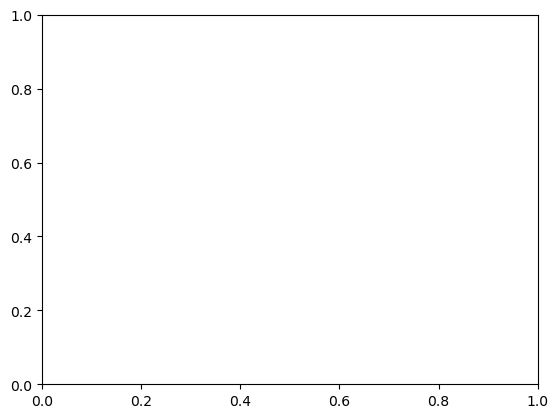

In [35]:
plt.plot(range(1,10),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors[:5],label='TEST RMSE')
plt.ylabel('RISE')
plt.xlabel('Degree of Poly')
plt.legend()

In [36]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [38]:
final_model=LinearRegression()

In [40]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)


LinearRegression()

In [42]:
from joblib import dump,load 

In [44]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [46]:
from joblib import dump

dump(final_poly_converter, 'final_converter.joblib')



['final_converter.joblib']

In [48]:
from joblib import load

loaded_converter = load('final_converter.joblib')
loaded_converter = load('final_poly_model.joblib')

In [50]:
campaign=[[149,22,12]]

In [52]:
transformed_data = loaded_converter.transform(campaign)  # Use transform, not fit_transform


AttributeError: 'LinearRegression' object has no attribute 'transform'

In [54]:
loaded_model.predict(transformed_data)

NameError: name 'loaded_model' is not defined